Women Cloth Reviews Prediction Using Multinomial Naive Bayes

Objective:

To predict the sentiment of women clothing reviews using the Multinomial Naive Bayes algorithm.

Data Source:

The dataset is obtained from Kaggle: "Women's E-Commerce Clothing Reviews",Link:https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import Data

In [2]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

Describe Data

In [3]:
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0  Clothing ID  Age                    Title   
0           0          767   33                      NaN  \
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND   
0  Absolutely wonderful - silky and sexy and comf...       4                1  \
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

Data Visualization

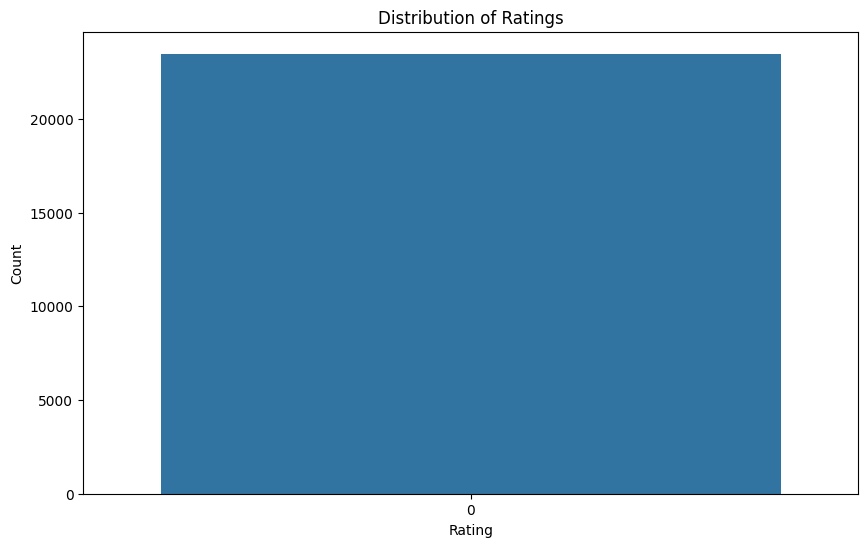

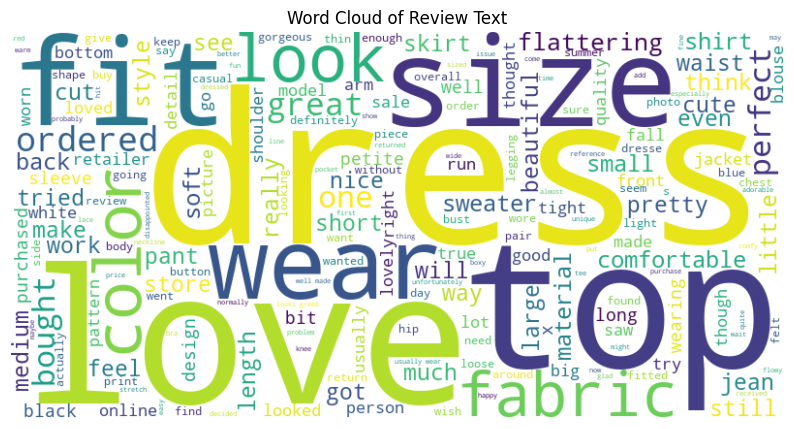

In [4]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(data['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Word Cloud of Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Review Text'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

Data Preprocessing

In [5]:
# Handling missing values
data = data.dropna(subset=['Review Text'])

# Converting the ratings into binary sentiment
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Review Text'])

y = data['Sentiment']

Define Target Variable (y) and Feature Variable (X)

In [6]:
y = data['Sentiment']

X = vectorizer.fit_transform(data['Review Text'])

Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Model Evaluation

In [9]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8767939942592183
Confusion Matrix:
 [[ 731  314]
 [ 244 3240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1045
           1       0.91      0.93      0.92      3484

    accuracy                           0.88      4529
   macro avg       0.83      0.81      0.82      4529
weighted avg       0.87      0.88      0.88      4529



Prediction

In [10]:
# Predicting sentiment for new reviews
new_reviews = ["I love this dress!", "The material is poor."]
new_reviews_transformed = vectorizer.transform(new_reviews)
predictions = model.predict(new_reviews_transformed)

for review, sentiment in zip(new_reviews, predictions):
    print(f'Review: {review} -> Sentiment: {"Positive" if sentiment == 1 else "Negative"}')

Review: I love this dress! -> Sentiment: Positive
Review: The material is poor. -> Sentiment: Negative


Explanation:

The code provided is a complete workflow for predicting the sentiment of women's clothing reviews using the Multinomial Naive Bayes algorithm. It begins with importing the necessary libraries and loading the dataset. The data is then explored and visualized to understand its structure and distribution. Missing values are handled, and the ratings are converted into binary sentiment labels (positive or negative). The review texts are vectorized using CountVectorizer, transforming them into numerical data suitable for model training. The dataset is split into training and testing sets, and a Multinomial Naive Bayes model is trained on the training data. The model's performance is evaluated using accuracy, confusion matrix, and classification report. Finally, the model is used to predict the sentiment of new, unseen reviews.